# Titanic Data

Q：
 What factors made people more likely to survive?
 1. Age
 2. Sex
 3. Pclass


In [87]:
#libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from CSVs

In [88]:
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fixing Data Types

In [89]:
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return float(i)

In [90]:
titanic['Fare'].apply(parse_maybe_float)
titanic['Age'].apply(parse_maybe_float)
titanic['Parch'].apply(parse_maybe_int)
titanic['Pclass'].apply(parse_maybe_int)
titanic['SibSp'].apply(parse_maybe_int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check Missing Data

In [91]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Conclusion: Age, Cabin and Embarked have missing data 

## Cleaning Missing data

In [92]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


##  Check Repeated Name

In [93]:
print len(titanic)
print len(titanic['Name'].unique())

891
891


## Conclusion: the length is same, so there is no repeated name.

## explore the correlation between survival rate and gender

In [94]:
#calculate survival rates of male and female separately
titanic.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

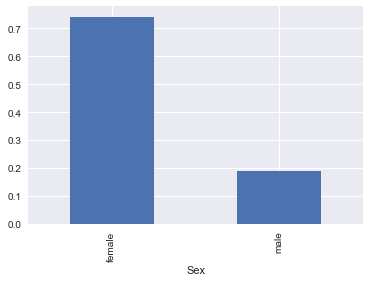

In [95]:
#visualize survived rates
%matplotlib inline
titanic.groupby("Sex")["Survived"].mean().plot.bar()

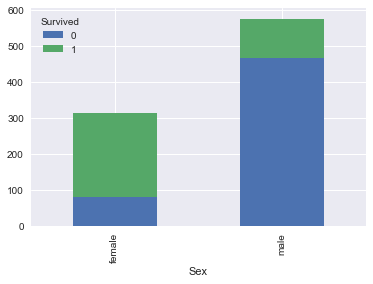

In [96]:
#compare total number with survived number between female and male
titanic.groupby(["Sex", "Survived"])['Survived'].count().unstack().plot.bar(stacked=True)

## Conclusion: Females display a higher survival rate. And the reason may be males on titanic are gentlemanly. So, females have higher rescue priority.  But there may be still other factors casuing this trend. For example, most of female are workers on titanic, who are familiar with  emergency equipment and receive professional survival training. Therefore, we need more datas to drill down into.

## explore the correlation between survival rate and age

In [97]:
#All passengers are divided as child, adult and older according to age.
def age_classify(age):
    if age <= 15:
        return "Child"
    elif 15 < age <= 55:
        return "Adult"
    elif age > 55:
        return "Older"

titanic["Age"] = titanic["Age"].apply(age_classify).dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S


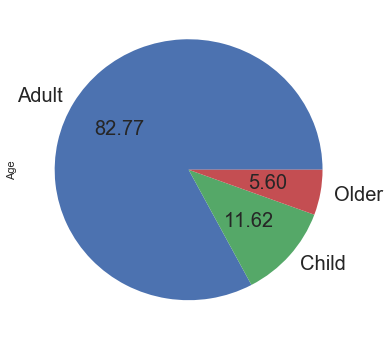

In [98]:
#different age groups' percentage
titanic.groupby("Age")["Age"].count().plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

## coclusion: most of passengers are adult

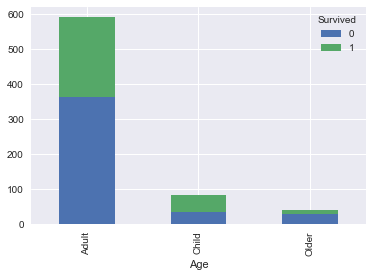

In [99]:
#compare total number with survived number between different age groups
%matplotlib inline
titanic.groupby(["Age", "Survived"])['Survived'].count().unstack().plot.bar(stacked=True)

In [100]:
titanic.groupby('Age').sum()['Survived'] / titanic.groupby('Age').size()


Age
Adult    0.387479
Child    0.590361
Older    0.300000
dtype: float64

## Concluson: Children have highest survival rate. The reason may be that parents try their best to save their childern. In addition, the older's survival rate is lowerst. The result displays that the older's slackening physical condition make it difficult to survive in such a severe accident. However, because of many missing datas in age, it is difficult to draw an accurate conclusion until all datas are received.

## explore the correlation between survival rate and pclass

In [101]:
#calculate survival rates of different pclasses
titanic.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

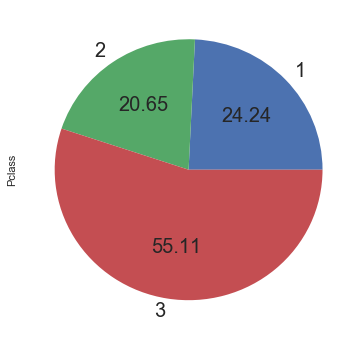

In [102]:
#different pclasses' percentage
titanic.groupby("Pclass")["Pclass"].count().plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

## conclusion: the people in class 3 take up over half of total number and the rest is divived by class 1 and class 2 equally.

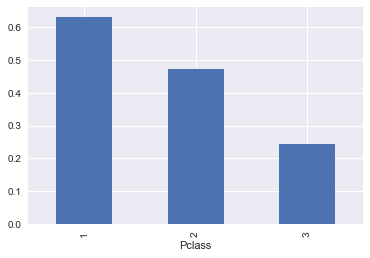

In [103]:
#visualize survival rates of different pclasses
titanic.groupby("Pclass")["Survived"].mean().plot.bar()

## conclusion: Class 1 has highest survival rate. More safety equipments in class 1 may  cause  this result. However, the gap of survival rates between class 1 and class 2 is not so large that we can gain an accurate conclusion. 